In [2]:

import pandas as pd
import re
import matplotlib.pyplot as plt
import os
import numpy as np
from pycytominer import aggregate, annotate, normalize, feature_select, cyto_utils
from cytominer_eval import evaluate
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

In [3]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')
df = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/runs/827/827_25_aggregated_median.csv', low_memory=False)

In [4]:
df_meta = pd.read_csv('/Users/mbornhol/git/neural-profiling/pre-trained/data-prep/02_index_preperation/repurposing_info_external_moa_map_resolved.tsv', sep='\t')
df_meta = df_meta[['broad_sample', 'moa']]
df_meta.rename(columns = {'broad_sample' : 'Metadata_broad_sample', 'moa' : 'Metadata_moa'}, inplace=True)

In [5]:
# select subsections
index = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/index/817_index.csv')

In [6]:
trained_moa = index['Metadata_moa'].unique().tolist()
untrained_moa = [c for c in df['Metadata_moa'].unique().tolist() if c not in trained_moa]
untrained_moa.append('unknown')

In [7]:
df_trained = df[df['Metadata_moa'].isin(trained_moa)]
df_untrained = df[df['Metadata_moa'].isin(untrained_moa)]
df_trained.to_csv('df_trained.csv', index=False)
df_untrained.to_csv('df_untrained.csv', index=False)

In [14]:
e = eval.evaluation(df_path= 'df_trained.csv')
con = e.norm_agg()
enr_trained_25 = e.eval(con, operation = 'enrichment')
prec_trained_25 = e.eval(con, operation = 'precision_recall')

1280 features were identified


In [15]:
e = eval.evaluation(df_path= 'df_untrained.csv')
con = e.norm_agg()
enr_untrained_25 = e.eval(con, operation = 'enrichment')
prec_untrained_25 = e.eval(con, operation = 'precision_recall')

1280 features were identified


In [16]:
e = eval.evaluation(df_path= '/Users/mbornhol/git/neural-profiling/training/runs/827/827_25_aggregated_median.csv')
con = e.norm_agg()
enr_all_25 = e.eval(con, operation = 'enrichment')
prec_all_25 = e.eval(con, operation = 'precision_recall')

1280 features were identified


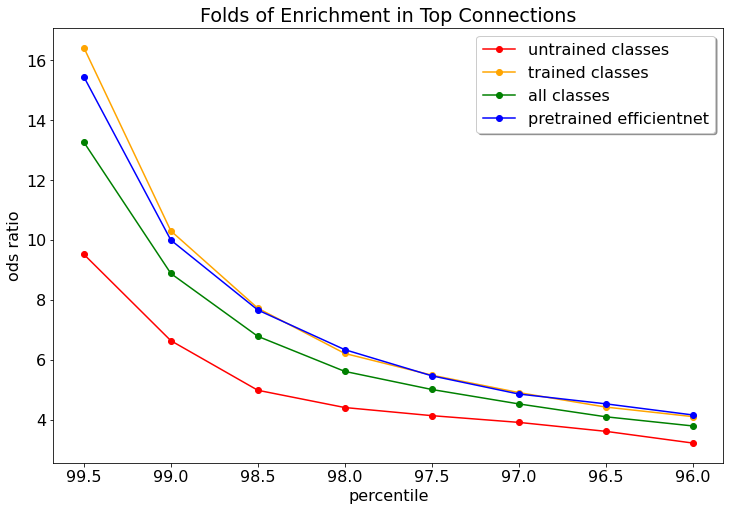

In [21]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*enr_untrained_25["enrichment_percentile"], enr_untrained_25["ods_ratio"], marker="o", color="red", label = 'untrained classes')
plt.plot(100*enr_trained_25["enrichment_percentile"], enr_trained_25["ods_ratio"], marker="o", color="orange", label = 'trained classes')
plt.plot(100*enr_all_25["enrichment_percentile"], enr_all_25["ods_ratio"], marker="o", color="green", label = 'all classes')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="blue", label = 'pretrained efficientnet')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

In [17]:
df = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/runs/827/827_16_aggregated_median.csv', low_memory=False)
df_trained = df[df['Metadata_moa'].isin(trained_moa)]
df_untrained = df[df['Metadata_moa'].isin(untrained_moa)]
df_trained.to_csv('df_trained.csv', index=False)
df_untrained.to_csv('df_untrained.csv', index=False)

In [18]:
e = eval.evaluation(df_path= 'df_trained.csv')
con = e.norm_agg()
enr_trained_16 = e.eval(con, operation = 'enrichment')
prec_trained_16 = e.eval(con, operation = 'precision_recall')

1280 features were identified


In [19]:
e = eval.evaluation(df_path= 'df_untrained.csv')
con = e.norm_agg()
enr_untrained_16 = e.eval(con, operation = 'enrichment')
prec_untrained_16 = e.eval(con, operation = 'precision_recall')

1280 features were identified


In [20]:
res_all_16 = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/runs/827/827_16_results.csv')

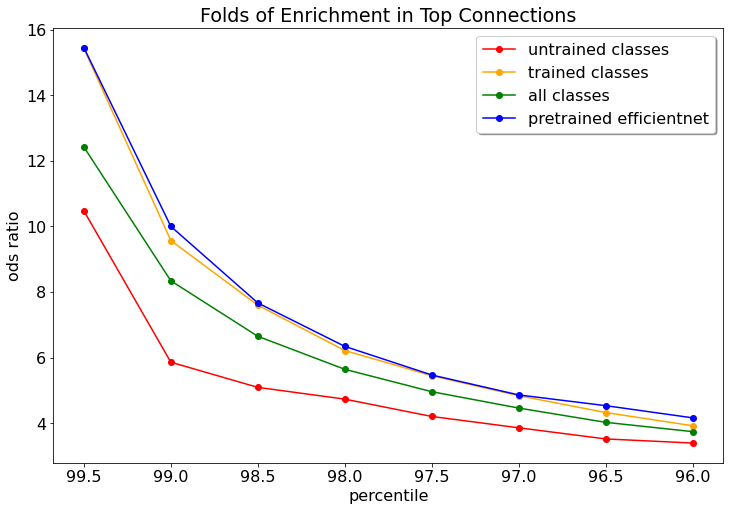

In [22]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*enr_untrained_16["enrichment_percentile"], enr_untrained_16["ods_ratio"], marker="o", color="red", label = 'untrained classes')
plt.plot(100*enr_trained_16["enrichment_percentile"], enr_trained_16["ods_ratio"], marker="o", color="orange", label = 'trained classes')
plt.plot(100*res_all_16["enrichment_percentile"], res_all_16["ods_ratio"], marker="o", color="green", label = 'all classes')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="blue", label = 'pretrained efficientnet')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()


In [23]:
df = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/runs/827/827_8_aggregated_median.csv', low_memory=False)
df_trained = df[df['Metadata_moa'].isin(trained_moa)]
df_untrained = df[df['Metadata_moa'].isin(untrained_moa)]
df_trained.to_csv('df_trained.csv', index=False)
df_untrained.to_csv('df_untrained.csv', index=False)

In [24]:
e = eval.evaluation(df_path= 'df_trained.csv')
con = e.norm_agg()
enr_trained_8 = e.eval(con, operation = 'enrichment')
prec_trained_8 = e.eval(con, operation = 'precision_recall')

1280 features were identified


In [25]:
e = eval.evaluation(df_path= 'df_untrained.csv')
con = e.norm_agg()
enr_untrained_8 = e.eval(con, operation = 'enrichment')
prec_untrained_8 = e.eval(con, operation = 'precision_recall')

1280 features were identified


In [26]:
res_all_8 = pd.read_csv('/Users/mbornhol/git/neural-profiling/training/runs/827/827_8_results.csv')

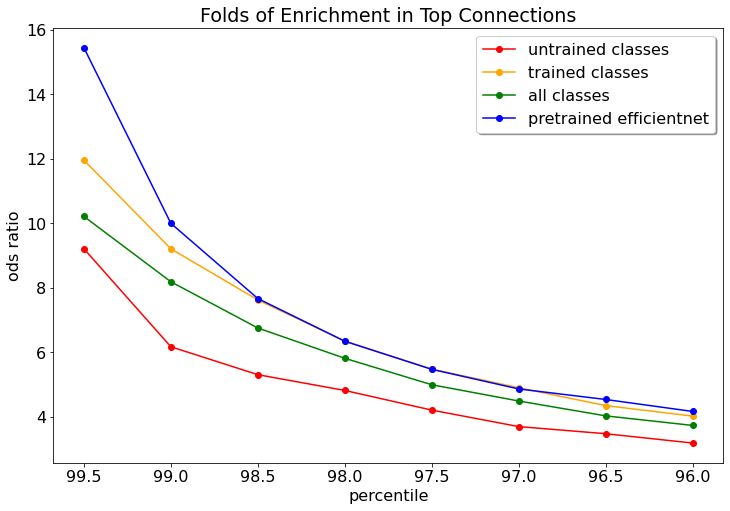

In [28]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*enr_untrained_8["enrichment_percentile"], enr_untrained_8["ods_ratio"], marker="o", color="red", label = 'untrained classes')
plt.plot(100*enr_trained_8["enrichment_percentile"], enr_trained_8["ods_ratio"], marker="o", color="orange", label = 'trained classes')
plt.plot(100*res_all_8["enrichment_percentile"], res_all_8["ods_ratio"], marker="o", color="green", label = 'all classes')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="blue", label = 'pretrained efficientnet')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()

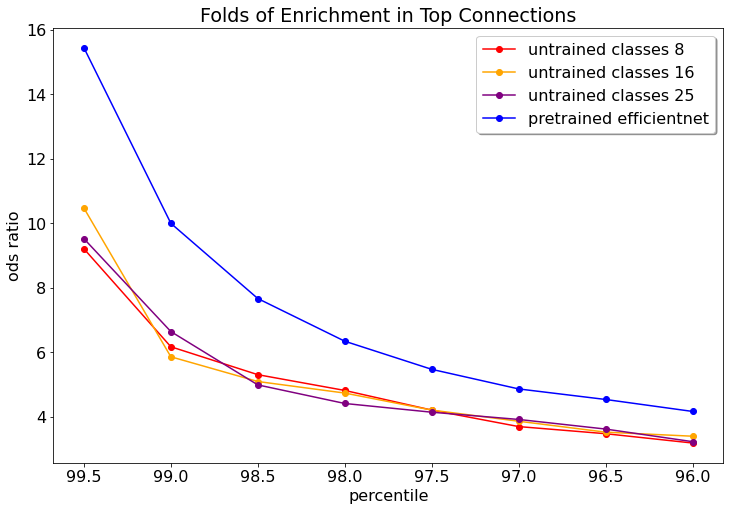

In [30]:
# compare development
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*enr_untrained_8["enrichment_percentile"], enr_untrained_8["ods_ratio"], marker="o", color="red", label = 'untrained classes 8')
plt.plot(100*enr_untrained_16["enrichment_percentile"], enr_untrained_16["ods_ratio"], marker="o", color="orange", label = 'untrained classes 16')
plt.plot(100*enr_untrained_25["enrichment_percentile"], enr_untrained_25["ods_ratio"], marker="o", color="purple", label = 'untrained classes 25')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="blue", label = 'pretrained efficientnet')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()


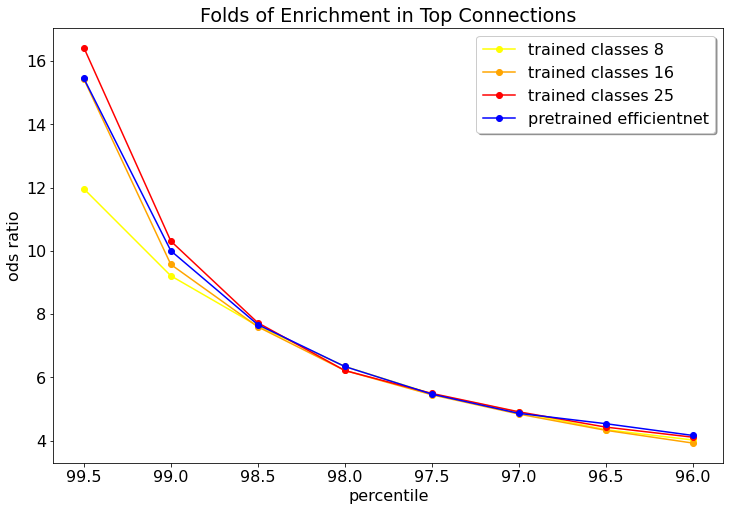

In [32]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*enr_trained_8["enrichment_percentile"], enr_trained_8["ods_ratio"], marker="o", color="yellow", label = 'trained classes 8')
plt.plot(100*enr_trained_16["enrichment_percentile"], enr_trained_16["ods_ratio"], marker="o", color="orange", label = 'trained classes 16')
plt.plot(100*enr_trained_25["enrichment_percentile"], enr_trained_25["ods_ratio"], marker="o", color="red", label = 'trained classes 25')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="blue", label = 'pretrained efficientnet')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()